# EJERCICIOS

In [53]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, MDS, TSNE
from sklearn.pipeline import make_pipeline

## EJERCICIO 1

Carga el conjunto de datos MNIST y divídelo en un conjunto de entrenamiento y un conjunto de prueba (coge las 60.000 primeras instancias para el entrenamiento y las 10.000 restantes para la prueba). 
Entrena un clasificador random forest en el conjunto de datos y cronometra cuánto tarda (puedes usar la anotación %time de jupyter notebook); luego, evalúa el modelo resultante en el conjunto de prueba. 

A continuación, utiliza PCA para reducir la dimensionalidad del conjunto de datos, con un ratio de varianza explicada del 95%. Entrena un nuevo clasificador random forest en el conjunto de datos reducido y comprueba cuánto tarda. ¿Ha sido el entrenamiento mucho más rápido? A continuación, evalúa el clasificador en el conjunto de prueba. ¿Qué tal lo hace en comparación con el clasificador anterior? 

Prueba otra vez con un SGDClassifier, ¿cuánto ayuda ahora el PCA?

In [54]:
# Cargamos el conjunto de datos
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto" )

# Dividimos caracteristicas del target
X_mnist, y_mnist = mnist.data, mnist.target

# Dividimos los conjuntos
X_train, y_train = X_mnist[:60_000], y_mnist[:60_000]
X_test, y_test = X_mnist[60_000:], y_mnist[60_000:]

In [55]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [56]:
# Creamos el clasificador
classifier = RandomForestClassifier(random_state=42)

# Lo entrenamos y cronometramos
print("Entrenando ", classifier)
%time classifier.fit(X_train, y_train)

Entrenando  RandomForestClassifier(random_state=42)
CPU times: user 39.9 s, sys: 39.9 ms, total: 40 s
Wall time: 40 s


RandomForestClassifier(random_state=42)

In [57]:
from sklearn.metrics import f1_score, mean_squared_error, precision_score, recall_score, roc_auc_score

# Predecimos
y_test_pred = classifier.predict(X_test)
y_test_pred_proba = classifier.predict_proba(X_test)  # Para calcular AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')

# Mostrar métricas
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Área bajo la curva ROC: {roc_auc:.2f}")

Exactitud: 0.97
Precisión: 0.97
Sensibilidad (Recall): 0.97
F1-Score: 0.97
Área bajo la curva ROC: 1.00


In [58]:
# Creamos el reductor PCA a un 95% de varianza y se lo aplicamos a los datos mnist
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [59]:
X_train_reduced[0]

array([ 1.23932589e+02,  3.12674262e+02,  2.45140518e+01,  5.55757958e+02,
       -2.72966682e+01,  2.32476284e+02,  2.33995733e+02,  1.59799494e+02,
       -3.63515021e+02,  1.98428077e+02, -1.97497025e+02, -2.54055913e+02,
        1.13496409e+02,  7.49302451e+02, -2.19259554e+02,  4.69324059e+00,
       -3.30151992e+02,  3.09153886e+02,  2.77593870e+02,  1.66332371e+02,
       -2.75418570e+01, -6.43533073e+01,  2.17178328e+02, -2.50244425e+02,
       -4.61660680e+01,  1.00339444e+02,  3.08006769e+02,  1.70105133e+02,
       -1.25514290e+02, -1.23399691e+02, -9.79579471e+01,  3.45751912e+01,
       -1.07484335e+02,  8.45984679e+01, -1.52403071e+02, -2.00802897e+02,
       -6.52408003e+01, -2.00219128e+02, -1.57660546e+02, -3.59742861e+02,
        1.85587109e+02, -1.54450111e+02,  4.02426309e+01,  8.49658546e+01,
        1.23869979e+02, -7.08801921e+00, -1.27540799e+02,  7.64373489e+01,
        3.41432681e+01,  1.99862112e+01, -1.30241511e+02, -1.09555383e+02,
       -1.18375522e+02, -

In [60]:
# Creamos el clasificador
another_classifier = RandomForestClassifier(random_state=42)

# Lo entrenamos y cronometramos
print("Entrenando ", another_classifier)
%time another_classifier.fit(X_reduced, y_train)

Entrenando  RandomForestClassifier(random_state=42)
CPU times: user 2min 2s, sys: 71.8 ms, total: 2min 2s
Wall time: 2min 2s


RandomForestClassifier(random_state=42)

In [61]:
# Predecimos
y_test_pred = another_classifier.predict(X_test_reduced)
y_test_pred_proba = another_classifier.predict_proba(X_test_reduced)  # Para calcular AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')

# Mostrar métricas
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Área bajo la curva ROC: {roc_auc:.2f}")

Exactitud: 0.95
Precisión: 0.95
Sensibilidad (Recall): 0.95
F1-Score: 0.95
Área bajo la curva ROC: 1.00


In [63]:
# Creamos el clasificador
classifier = SGDClassifier(random_state=42)

# Lo entrenamos y cronometramos
print("Entrenando ", classifier)
%time classifier.fit(X_train, y_train)

# Predecimos
y_test_pred = classifier.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

# Mostrar métricas
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Área bajo la curva ROC: {roc_auc:.2f}")

Entrenando  SGDClassifier(random_state=42)
CPU times: user 2min 2s, sys: 172 ms, total: 2min 2s
Wall time: 2min 3s
Exactitud: 0.87
Precisión: 0.89
Sensibilidad (Recall): 0.87
F1-Score: 0.87
Área bajo la curva ROC: 1.00


In [65]:
# Creamos el clasificador
another_classifier = SGDClassifier(random_state=42)

# Lo entrenamos y cronometramos
print("Entrenando ", another_classifier)
%time another_classifier.fit(X_train_reduced, y_train)

# Predecimos
y_test_pred = another_classifier.predict(X_test_reduced)

# Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')

# Mostrar métricas
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Área bajo la curva ROC: {roc_auc:.2f}")

Entrenando  SGDClassifier(random_state=42)
CPU times: user 31.8 s, sys: 7.97 ms, total: 31.8 s
Wall time: 31.8 s
Exactitud: 0.90
Precisión: 0.89
Sensibilidad (Recall): 0.89
F1-Score: 0.89
Área bajo la curva ROC: 1.00


## EJERCICIO 2 (OPCIONAL)

Utiliza t-SNE para reducir las primeras 5.000 imágenes del conjunto de datos MNIST a dos dimensiones (2 columas) 

In [ ]:
# Cogemos los primeros 5000 datos
X_slice = X_mnist[:5000]

# Creamos un reductor TSNE de dos componentes
tsne = TSNE(n_components=2, random_state=42)

# Transformamos los datos
X_tsne = tsne.fit_transform(X_slice)

Representa el resultado utilizando un gráfico de dispersión con 10 colores diferentes para representar la clase objetivo de cada imagen. 

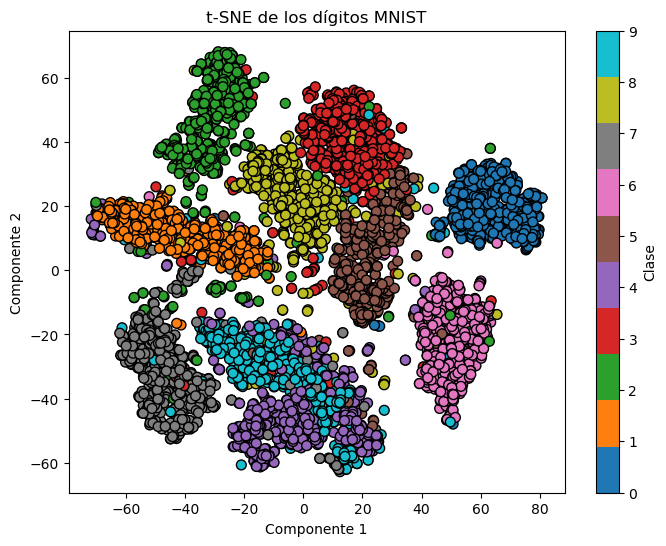

In [74]:
# Sacamos los primeros 5000 targets
y_slice = y_mnist[:5000]

# Graficar los datos en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_slice.astype(int), cmap='tab10', edgecolor='k', s=50)

# Añadir una barra de color que muestre las clases
plt.colorbar(scatter, label='Clase')

# Títulos y etiquetas
plt.title('t-SNE de los dígitos MNIST')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar el gráfico
plt.show()

 Prueba a utilizar otros algoritmos de reducción de dimensionalidad como PCA, LLE o MDS y compara las visualizaciones resultantes (la opción de MDS puede que tarde un rato).

Probando con pca


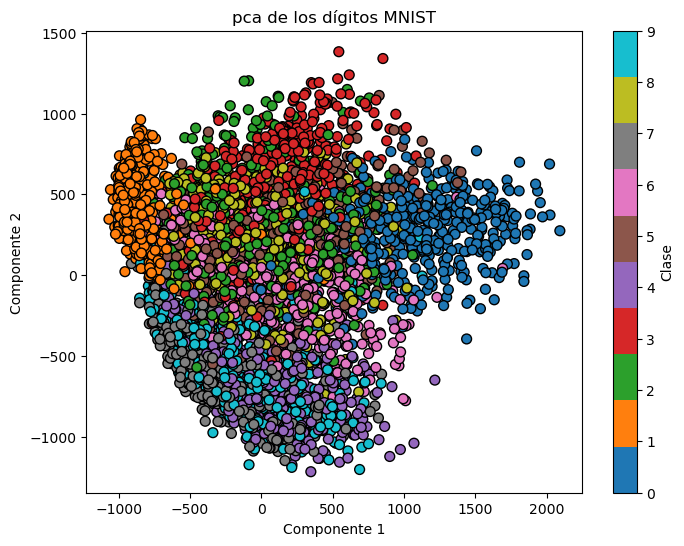

Probando con LLE


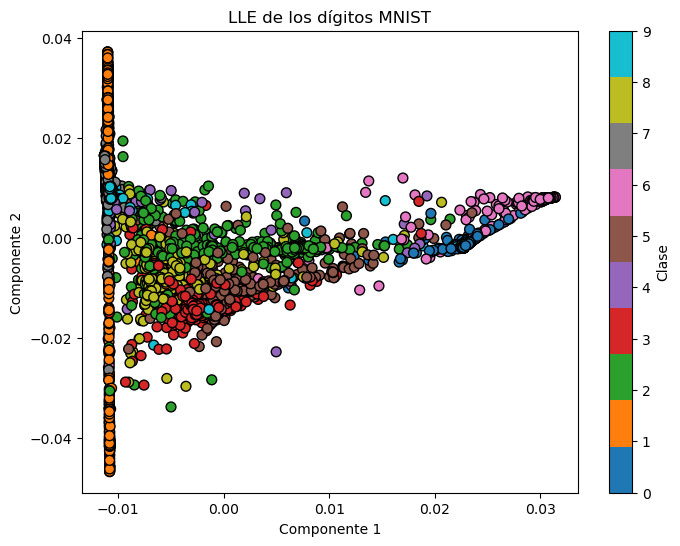

Probando con MDS


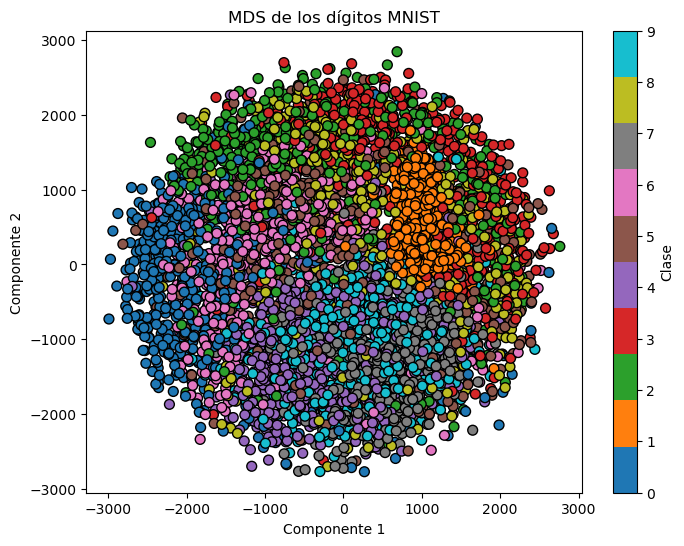

In [76]:
# Creamos un reductor TSNE de dos componentes
algorithms = {
    'PCA': PCA(n_components=2, random_state=42),
    'LLE': LocallyLinearEmbedding(n_components=2, random_state=42),
    'MDS': MDS(n_components=2, random_state=42)
}

# Transformamos los datos
for name,algorithm in algorithms.items():
    print(f"Probando con {name}")
    X_reduced = algorithm.fit_transform(X_slice)

    # Graficar los datos en 2D
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_slice.astype(int), cmap='tab10', edgecolor='k', s=50)

    # Añadir una barra de color que muestre las clases
    plt.colorbar(scatter, label='Clase')

    # Títulos y etiquetas
    plt.title(f'{name} de los dígitos MNIST')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')

    # Mostrar el gráfico
    plt.show()

 Prueba ahora creando un pipeline que primero aplique PCA y luego MDS (lanzalo con tiempo).

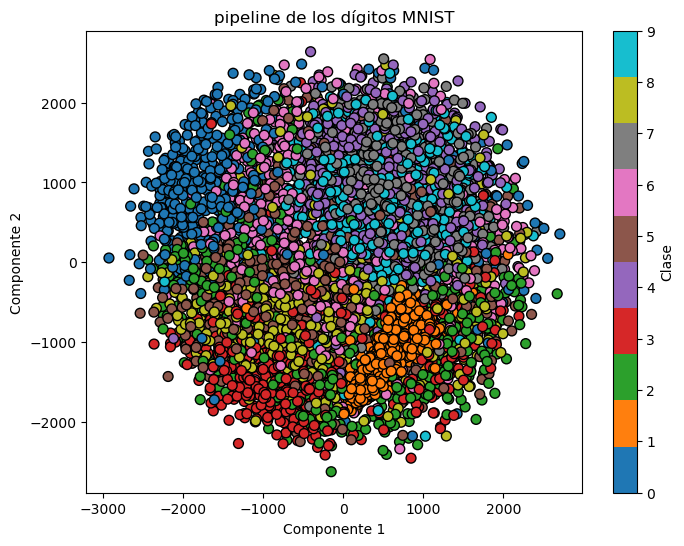

In [77]:
pipeline = make_pipeline(
    PCA(n_components=50),
    MDS(n_components=2)
)

X_reduced = pipeline.fit_transform(X_slice)

# Graficar los datos en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_slice.astype(int), cmap='tab10', edgecolor='k', s=50)

# Añadir una barra de color que muestre las clases
plt.colorbar(scatter, label='Clase')

# Títulos y etiquetas
plt.title('pipeline de los dígitos MNIST')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar el gráfico
plt.show()